### This is a simple CNN Network

In [1]:
# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#data sugmentation
# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
training_set = train_datagen.flow_from_directory('image_data/training',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 198 images belonging to 2 classes.


In [3]:
# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('image_data/validation',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 100 images belonging to 2 classes.


In [4]:
## showing some image from training
import matplotlib.pyplot as plt
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

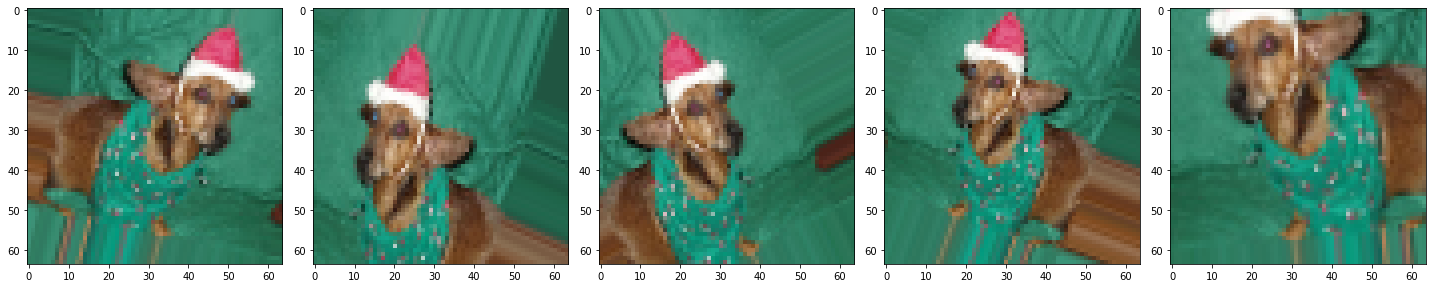

In [5]:
images = [training_set[0][0][0] for i in range(5)]
plotImages(images)

### Model Build Use Only CNN

In [6]:
from tensorflow.keras.layers import Conv2D

In [7]:
# Part 2 - Building the CNN

# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - # Adding a first convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
## step 2 - #apply maxpool
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) ## Apply pooing stride

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
tf.keras.layers.Dropout(0.5)

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [8]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [9]:
# Training the CNN on the Training set and evaluating it on the Test set
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 2)

Epoch 1/2
7/7 [==============================] - 4s 410ms/step - loss: 0.7529 - accuracy: 0.4600 - val_loss: 0.6988 - val_accuracy: 0.5000
Epoch 2/2
7/7 [==============================] - 2s 308ms/step - loss: 0.6898 - accuracy: 0.5349 - val_loss: 0.6932 - val_accuracy: 0.5100


### Save And Load Model

In [10]:
#save model
from tensorflow.keras.models import load_model
cnn.save('model_rcat_dog.h5')

In [11]:
from tensorflow.keras.models import load_model
# load model
model = load_model('model_rcat_dog.h5')

In [12]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('image_data/test/3285.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
result 

array([[0.5059088]], dtype=float32)

The image classified is dog


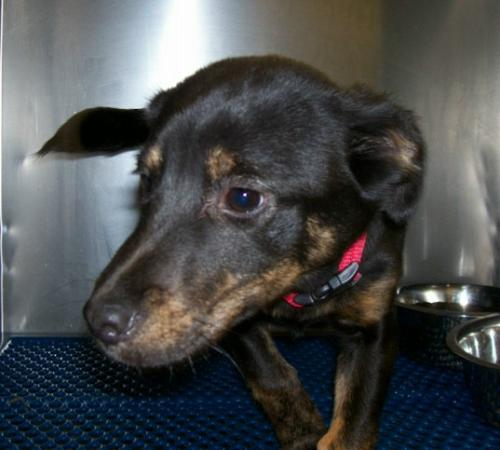

In [13]:
if result[0]<=0.5:
    print("The image classified is cat")
else:
    print("The image classified is dog")
    
from IPython.display import Image
Image(filename='image_data/test/3285.jpg',height='200',width='200') 